In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from paretochart.paretochart import pareto


In [2]:
app = dash.Dash(__name__)

In [3]:
sales_df = pd.read_excel(
    r'Pratyaksh_SMB Case Study Data.xlsx', sheet_name='Sales Data')
customer_df = pd.read_excel(r'Pratyaksh_SMB Case Study Data.xlsx', sheet_name='Customer')
traffic_df = pd.read_excel(r'Pratyaksh_SMB Case Study Data.xlsx', sheet_name='Traffic_DemandGen data')
to_drop = ['Encrypted Email', 'Employee Size', 'Units',
           'Margin', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Recency']
sales_df.drop(to_drop, axis=1, inplace=True)

In [4]:
sales_df.sort_values(
    by=['Revenue'], ascending=False, inplace=True)
sales_19 = sales_df[sales_df['Quarter'].str.startswith('FY19')]
sales_20 = sales_df[sales_df['Quarter'].str.startswith('FY20')]
print(sales_20)


       Quarter         Country   Company Name  Tier  \
19582  FY20'Q1   United States   Customer4156  Gold   
22232  FY20'Q2   United States  Customer11236  Gold   
16289  FY20'Q1   United States  Customer11931  Gold   
26937  FY20'Q2   United States  Customer13515  Gold   
28705  FY20'Q2  United Kingdom  Customer14359  Gold   
...        ...             ...            ...   ...   
28412  FY20'Q2  United Kingdom  Customer19604  Base   
18915  FY20'Q1  United Kingdom  Customer13559  Base   
17466  FY20'Q1   United States  Customer12658  Base   
28966  FY20'Q2  United Kingdom  Customer19933  Base   
24445  FY20'Q2  United Kingdom  Customer17096  Base   

                                Industry  Revenue  Orders     AOV  
19582                 Retail & Wholesale   298882       2  149441  
22232                           Services   277210      98    2829  
16289  Manufacturing & Natural Resources   206403       3   68801  
26937                    Heath & Welfare   185806       5   37161  

In [5]:
total_revenue = sales_19['Revenue'].sum()
gold_revenue_total=sales_19[(sales_19['Tier'] == 'Gold')]['Revenue'].sum()
silver_revenue_total = sales_19[sales_19['Tier'] == 'Silver']['Revenue'].sum()
base_revenue_total = sales_19[sales_19['Tier'] == 'Base']['Revenue'].sum()
print(total_revenue,gold_revenue_total,silver_revenue_total,base_revenue_total)

70298719 12004129 23215045 35079545


In [6]:
print("\% \ of gold", gold_revenue_total*100/total_revenue)
print("\% \ of silver", silver_revenue_total*100/total_revenue)
print("\% \ of base", base_revenue_total*100/total_revenue)

\% \ of gold 17.075885835131647
\% \ of silver 33.02342536284338
\% \ of base 49.90068880202497


In [7]:
total_revenue*0.8

56238975.2

In [8]:
print("Total: ", total_revenue)
print("Gold: ", gold_revenue_total)
print("Silver: ", silver_revenue_total)
print("Base: ", base_revenue_total)

Total:  70298719
Gold:  12004129
Silver:  23215045
Base:  35079545


In [9]:
9681/len(sales_df.index)

0.3325775533340204

In [10]:
sales_19.groupby('Industry').agg('sum')

,Revenue,Orders,AOV
Industry,,,
Retail & Wholesale,4903237,1589,3287958
Agriculture,3511903,1149,2259882
Communication,14283210,4309,9076828
Construction,2399136,843,1516283
Education,5405231,1707,3562556
Financial,6264612,1910,3911459
Government,1033446,302,672618
Heath & Welfare,9202906,2974,5855993
Manufacturing & Natural Resources,10460876,3270,6527009


In [11]:
44752790*0.8

35802232.0

In [12]:
traffic_df

,Demand Generation - Marketing Channels,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,"Aggregated Traffic Data - US, UK, AU",...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Traffic Data - AU,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Quarter,Country,Month,Channel,Buyers,Revenue,Orders,NaN,NaN,Month,...,Channel,Visits,Unique Visitors,Orders,NaN,Month,Channel,Visits,Unique Visitors,Orders
1,FY19'Q1,Australia,2018-04-01 00:00:00,Direct,19,234046,31,NaN,NaN,2018-04-01 00:00:00,...,SEO,4136,3653,46,NaN,2018-04-01 00:00:00,Direct,174,87,23
2,FY19'Q1,Australia,2018-04-01 00:00:00,SEO,5,6759,5,NaN,NaN,2018-04-01 00:00:00,...,SEM,3044,2721,37,NaN,2018-04-01 00:00:00,SEO,66,36,5
3,FY19'Q1,Australia,2018-04-01 00:00:00,Affiliate,1,765,1,NaN,NaN,2018-04-01 00:00:00,...,Direct,2894,2532,22,NaN,2018-04-01 00:00:00,Email,56,16,4
4,FY19'Q1,Australia,2018-04-01 00:00:00,Email,6,34638,7,NaN,NaN,2018-04-01 00:00:00,...,Email,2163,1778,9,NaN,2018-04-01 00:00:00,SEM,24,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,FY20'Q2,United States,2019-09-01 00:00:00,Affiliate,267,748273,382,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,FY20'Q2,United States,2019-09-01 00:00:00,Email,367,1038713,449,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,FY20'Q2,United States,2019-09-01 00:00:00,SEM,269,644846,315,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,FY20'Q2,United States,2019-09-01 00:00:00,Organic Social,1,1396,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
demand_gen_df = pd.read_excel(r'Pratyaksh_SMB Case Study Data.xlsx', sheet_name='Traffic_DemandGen data', header=1, usecols="A:G",nrows=283)
agg_traffic_df = pd.read_excel(r'Pratyaksh_SMB Case Study Data.xlsx', sheet_name='Traffic_DemandGen data', header=1, usecols="J:N",nrows=76)
us_traffic_df = pd.read_excel(r'Pratyaksh_SMB Case Study Data.xlsx', sheet_name='Traffic_DemandGen data', header=1, usecols="P:T",nrows=90)
uk_traffic_df = pd.read_excel(r'Pratyaksh_SMB Case Study Data.xlsx', sheet_name='Traffic_DemandGen data', header=1, usecols="V:Z",nrows=89)
aus_traffic_df = pd.read_excel(r'Pratyaksh_SMB Case Study Data.xlsx', sheet_name='Traffic_DemandGen data', header=1, usecols="AB:AF",nrows=80)



In [14]:
print(us_traffic_df)

      Month.2  Channel.2  Visit  Unique Visitors.1  Orders.2
0  2018-04-01     Direct   5160               4505       142
1  2018-04-01        SEO   2671               2117        48
2  2018-04-01  Affiliate   2228               1708        35
3  2018-04-01      Email   1849               1432        18
4  2018-04-01        SEM   1329               1096        16
..        ...        ...    ...                ...       ...
85 2019-09-01     Direct  16693              12746      1115
86 2019-09-01        SEO  11208               6321       902
87 2019-09-01      Email   8509               5021       572
88 2019-09-01        SEM   4917               3111       520
89 2019-09-01  Affiliate   4369               2360       373

[90 rows x 5 columns]


In [42]:
us_data_18=us_traffic_df[us_traffic_df['Month.2']<'2019-01-01']
us_data_19=us_traffic_df[us_traffic_df['Month.2']>'2018-12-01']
us_data_18['Year']=2018
us_data_19['Year']=2019
res=pd.concat([us_data_18,us_data_19])

Text(0.5, 1.0, 'US Site Traffic')

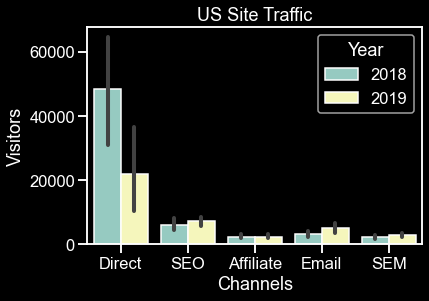

In [47]:

sns.barplot(data=res,x='Channel.2',y="Visit",hue='Year')
plt.xlabel('Channels')
plt.ylabel('Visitors')
plt.title('US Site Traffic')

Text(0.5, 1.0, 'US Site Traffic')

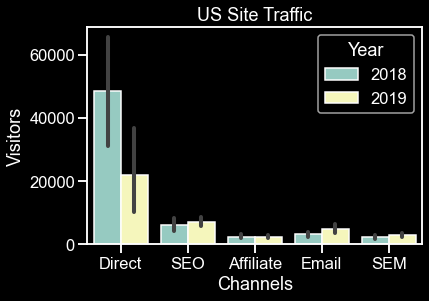

In [48]:
sns.barplot(data=res,x='Channel.2',y="Visit",hue='Year')
plt.xlabel('Channels')
plt.ylabel('Visitors')
plt.title('US Site Traffic')

In [17]:
print(agg_traffic_df)

      Month.1  Channel.1  Visits  Unique Visitors  Orders.1
0  2018-04-01     Direct    7975             6932       211
1  2018-04-01        SEO    7248             6072        90
2  2018-04-01        SEM    4405             3841        61
3  2018-04-01      Email    4163             3316        29
4  2018-04-01  Affiliate    3586             2979        26
..        ...        ...     ...              ...       ...
71 2019-08-01        SEM   13620             9937      1060
72 2019-09-01     Direct   44556            35574       690
73 2019-09-01        SEO   35176            21361       398
74 2019-09-01      Email   25448            17788       299
75 2019-09-01        SEM   15301            10717      2004

[76 rows x 5 columns]


Text(0.5, 1.0, 'UK Site Traffic')

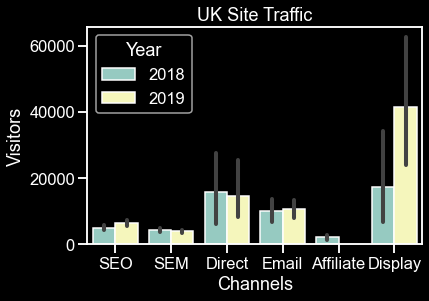

In [49]:
uk_data_18=uk_traffic_df[uk_traffic_df['Month.3']<'2019-01-01']
uk_data_19=uk_traffic_df[uk_traffic_df['Month.3']>'2018-12-01']
uk_data_18['Year']=2018
uk_data_19['Year']=2019
res=pd.concat([uk_data_18,uk_data_19])
sns.barplot(data=res,x='Channel.3',y="Visits.1",hue='Year')
plt.xlabel('Channels')
plt.ylabel('Visitors')
plt.title('UK Site Traffic')

Text(0.5, 1.0, 'AUS Site Traffic')

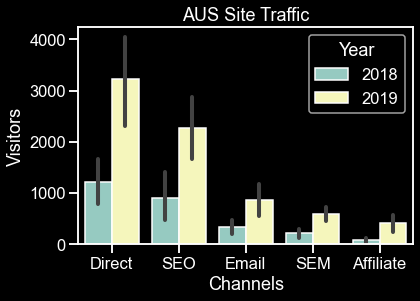

In [50]:
aus_data_18=aus_traffic_df[aus_traffic_df['Month.4']<'2019-01-01']
aus_data_19=aus_traffic_df[aus_traffic_df['Month.4']>'2018-12-01']
aus_data_18['Year']=2018
aus_data_19['Year']=2019
res=pd.concat([aus_data_18,aus_data_19])
sns.barplot(data=res,x='Channel.4',y="Visits.2",hue='Year')
plt.xlabel('Channels')
plt.ylabel('Visitors')
plt.title('AUS Site Traffic')

Text(0.5, 1.0, 'Aggregate Site Traffic')

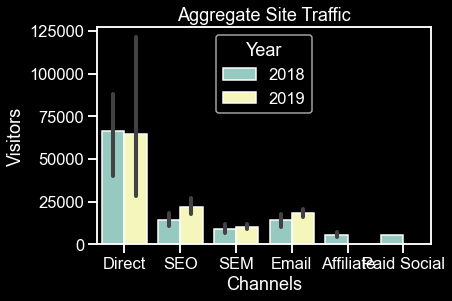

In [51]:
agg_data_18=agg_traffic_df[agg_traffic_df['Month.1']<'2019-01-01']
agg_data_19=agg_traffic_df[agg_traffic_df['Month.1']>'2018-12-01']
agg_data_18['Year']=2018
agg_data_19['Year']=2019
res=pd.concat([agg_data_18,agg_data_19])
sns.barplot(data=res,x='Channel.1',y="Visits",hue='Year')
plt.xlabel('Channels')
plt.ylabel('Visitors')
plt.title('Aggregate Site Traffic')

In [21]:
sales_19Q3=sales_df[sales_df['Quarter'].str.startswith('FY19\'Q3')]
sales_19Q2=sales_df[sales_df['Quarter'].str.startswith('FY19\'Q2')]
sales_19Q1=sales_df[sales_df['Quarter'].str.startswith('FY19\'Q1')]
sales_19Q4=sales_df[sales_df['Quarter'].str.startswith('FY19\'Q4')]
sales_20Q1=sales_df[sales_df['Quarter'].str.startswith('FY20\'Q1')]
sales_20Q2=sales_df[sales_df['Quarter'].str.startswith('FY20\'Q2')]
dropped_customer=sales_19Q3[sales_19Q3['Company Name'].isin(sales_19Q2['Company Name'])==False]
dropped_customer

,Quarter,Country,Company Name,Tier,Industry,Revenue,Orders,AOV
6522,FY19'Q3,United Kingdom,Customer5523,Gold,Education,174300,7,24900
6648,FY19'Q3,United Kingdom,Customer5607,Gold,Agriculture,156887,1,156887
8721,FY19'Q3,United States,Customer7033,Gold,Financial,100892,1,100892
7392,FY19'Q3,United States,Customer6113,Gold,Construction,77608,4,19402
9143,FY19'Q3,United States,Customer7345,Gold,Manufacturing & Natural Resources,72455,1,72455
...,...,...,...,...,...,...,...,...
6299,FY19'Q3,United Kingdom,Customer5371,Base,Transportation,243,1,243
5990,FY19'Q3,Australia,Customer5155,Base,Financial,243,1,243
5331,FY19'Q3,United States,Customer4687,Base,Construction,234,1,234
6076,FY19'Q3,United Kingdom,Customer5213,Base,Financial,233,1,233


In [22]:
print(len(sales_19Q3.index))


4029


In [23]:
print(len(sales_19Q2.index))

3123


In [24]:
dfs_dictionary = {'19Q2':sales_19Q2,'19Q3':sales_19Q3,'19Q1':sales_19Q1,'19Q4':sales_19Q4,'20Q1':sales_20Q1,'20Q2':sales_20Q2}
df=pd.concat(dfs_dictionary)
df.drop_duplicates(keep=False)


Quarter         Country   Company Name  Tier  \
19Q2 4602   FY19'Q2   United States    Customer106  Gold   
     2167   FY19'Q2   United States    Customer120  Gold   
     4452   FY19'Q2   United States   Customer1586  Gold   
     2626   FY19'Q2   United States    Customer480  Gold   
     3483   FY19'Q2   United States   Customer3186  Gold   
...             ...             ...            ...   ...   
20Q2 26494  FY20'Q2  United Kingdom  Customer13297  Base   
     27788  FY20'Q2  United Kingdom  Customer19249  Base   
     28412  FY20'Q2  United Kingdom  Customer19604  Base   
     28966  FY20'Q2  United Kingdom  Customer19933  Base   
     24445  FY20'Q2  United Kingdom  Customer17096  Base   

                         Industry  Revenue  Orders    AOV  
19Q2 4602   Nonprofit and Charity   101816       5  20363  
     2167              Financial    100857       4  25214  
     4452               Utilities    93808       3  31269  
     2626              Financial     93023      14   6645  
     3483      Retail & Wholesale    89260       4  22315  
...                           ...      ...     ...    ...  
20Q2 26494           Construction      227       1    227  
     27788        Heath & Welfare      225       1    225  
     28412          Communication      206       1    206  
     28966     Retail & Wholesale      180       1    180  
     24445           Construction      170       1    170  

[29107 rows x 8 columns]

In [25]:
sales_industry=sales_df.groupby('Industry').agg('sum')
sales_industry
labels=['Retail & Wholesale','Agriculture','Communication','Construction','Education','Financial','Government','Heath & Welfare','Manufacturing & Natural Resources','Nonprofit and Charity','Retail & Wholesale','Services','Transportation','Utilities']


In [26]:

px.paretochart

AttributeError: module 'plotly.express' has no attribute 'paretochart'

In [42]:
sales_df.head(10)

,Quarter,Country,Company Name,Tier,Industry,Revenue,Orders,AOV
19582,FY20'Q1,United States,Customer4156,Gold,Retail & Wholesale,298882,2,149441
10370,FY19'Q4,United States,Customer8128,Gold,Transportation,293016,3,97672
22232,FY20'Q2,United States,Customer11236,Gold,Services,277210,98,2829
12778,FY19'Q4,United States,Customer3931,Gold,Communication,251252,9,27917
8381,FY19'Q3,United States,Customer106,Gold,Nonprofit and Charity,210785,4,52696
16289,FY20'Q1,United States,Customer11931,Gold,Manufacturing & Natural Resources,206403,3,68801
11051,FY19'Q4,United Kingdom,Customer854,Gold,Construction,197500,1,197500
10493,FY19'Q4,United Kingdom,Customer2685,Gold,Transportation,192220,6,32037
26937,FY20'Q2,United States,Customer13515,Gold,Heath & Welfare,185806,5,37161
10988,FY19'Q4,United Kingdom,Customer8522,Gold,Communication,185345,2,92673


In [58]:
sales_df=sales_df.groupby('Industry').agg('sum')

sales_df

AttributeError: 'NoneType' object has no attribute 'groupby'